# Fitting max-stable PCA to max-linear models

In [1]:
library(evd)
library(maxstablePCA)
library(dplyr)
library(GGally)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
set.seed(1357)
s <- 200

In [3]:
A <- matrix(
    c(1, 1/3, 0, 1/2, 1/5, 1/4, 
      0, 2/3, 0, 1/2, 0, 1/4, 
      0, 0, 1, 0, 4/5, 1/2, 
      rep(0, 6*3)
     ), 
    6, 6
)

In [4]:
A

1.0000000,0.0000000,0.0,0,0,0
0.3333333,0.6666667,0.0,0,0,0
0.0000000,0.0000000,1.0,0,0,0
0.5000000,0.5000000,0.0,0,0,0
0.2000000,0.0000000,0.8,0,0,0
0.2500000,0.2500000,0.5,0,0,0


In [5]:
library(foreach)
library(doParallel)

#setup parallel backend to use many processors
cores=detectCores()
cl <- makeCluster(cores[1]-1) #not to overload your computer
registerDoParallel(cl)

emp_errors_A <- foreach(i=1:100, .combine=c) %dopar% {
    
    library(evd)
    library(maxstablePCA)
    
    Z <- matrix(rfrechet(60000), 10000, 6)
    X <- t(maxmatmulC(A, t(Z)))
    Xtrafo <- transform_unitpareto(X)
    
    maxPCA_curr <- max_stable_prcomp(Xtrafo, p = 3, s = s)
    
   emp_error_curr = maxPCA_curr$loss_fctn_value
   emp_error_curr 
}

#stop cluster
stopCluster(cl)

Loading required package: iterators

Loading required package: parallel



In [6]:
emp_errors_A

[1] 0.3761491 0.4516051 0.4282146 1.3644813 0.2337737 1.3519671 0.4335597
  [8] 1.5211531 1.4706412 0.1836544 0.1327301 0.1382852 0.1505269 1.3608057
 [15] 1.3264374 0.5442020 1.3853046 1.5795682 0.4106198 1.5259718 0.3918076
 [22] 0.1526066 1.4244760 0.3524621 0.3322878 0.1692243 1.4845945 1.5335933
 [29] 0.1588912 0.4217103 0.3720792 1.4153395 0.3859042 0.4590739 0.3903022
 [36] 0.1394931 0.1420652 1.5186755 0.5807386 0.1393237 0.2849928 0.1198124
 [43] 1.4337872 1.5257172 0.1464461 0.1246409 0.3877866 1.5185848 0.1999776
 [50] 0.2537716 0.2328755 1.3646822 0.1209550 1.4688591 0.1548099 0.6015179
 [57] 0.1479107 0.1287357 1.4109806 1.3977001 0.6205489 0.4407954 0.6143809
 [64] 0.3513311 0.1501603 0.1339636 1.4125338 0.3475870 0.3647845 0.4481793
 [71] 0.3742334 0.1893538 0.0942622 0.4170719 1.1697889 0.5259337 1.1721369
 [78] 0.3665767 0.3513746 0.2170344 0.3266337 0.4321758 0.3480698 0.6408089
 [85] 0.3309671 0.2394513 0.2515519 2.0228111 1.5149573 1.5626086 1.4161174
 [92] 0.4861440 0.3713043 1.3735536 0.5694902 0.1371692 0.1397325 1.5224946
 [99] 0.3212935 0.3928041

In [7]:
plot_dat <- data.frame(emp_errors = emp_errors_A)

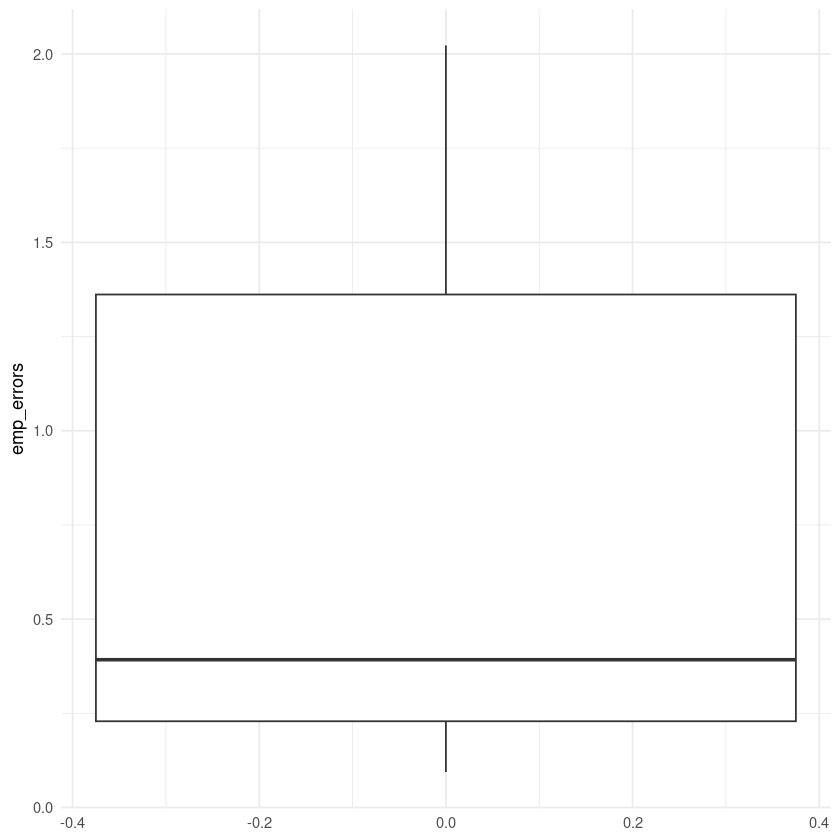

In [8]:
p1 <- ggplot(aes(y = emp_errors), data = plot_dat) + 
geom_boxplot() + 
theme_minimal()

p1

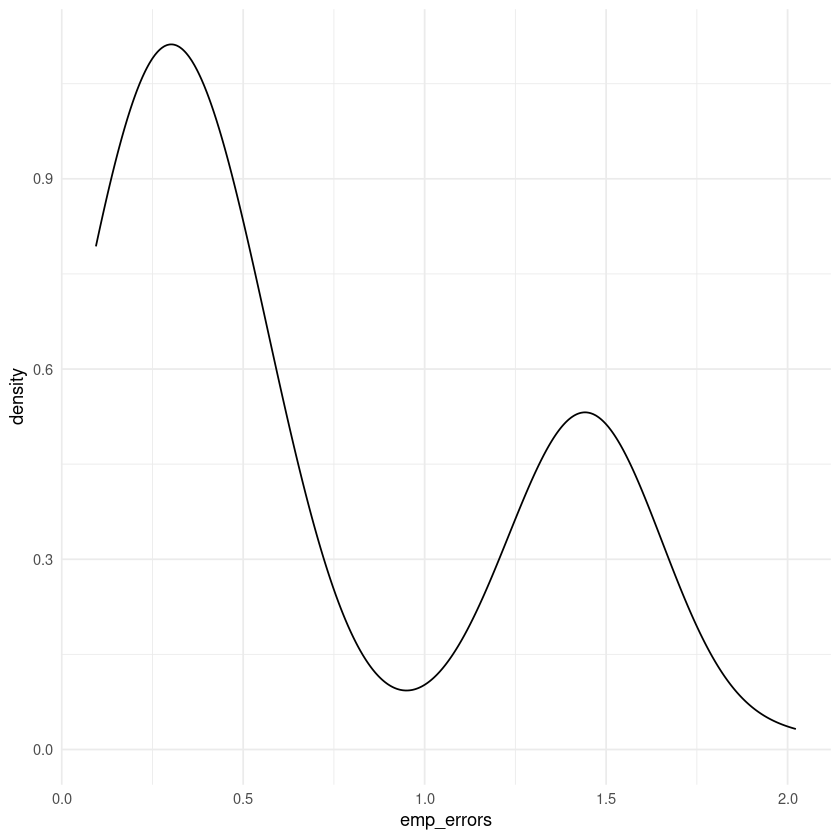

In [9]:
p2 <- ggplot(aes(x = emp_errors), data = plot_dat) + 
geom_density() + 
theme_minimal()

p2

In [12]:
ggsave("boxplots_mlmgraphicalsim.png", p1)
ggsave("densplots_mlmgraphicalsim.png", p2)

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
